In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#STEP 2.2 — Load Cleaned Dataset for Feature Engineering & Modeling

In [5]:
file_path = '../data/creditcard_cleaned.csv'
df = pd.read_csv(file_path)
print(f"Loaded dataset shape:{df.shape}")
df.head()

Loaded dataset shape:(283726, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#STEP 2.3 — Feature Scaling for 'Amount' and 'Time'

In [6]:
scaler = StandardScaler()

df[['Amount_scaled', 'Time_scaled']]= scaler.fit_transform(df[['Amount','Time']])
print(df[['Amount', 'Time','Amount_scaled','Time_scaled']].head())

   Amount  Time  Amount_scaled  Time_scaled
0  149.62   0.0       0.244200    -1.996823
1    2.69   0.0      -0.342584    -1.996823
2  378.66   1.0       1.158900    -1.996802
3  123.50   1.0       0.139886    -1.996802
4   69.99   2.0      -0.073813    -1.996781


In [ ]:
# STEP 2.4 — Dropping Original 'Amount' and 'Time' Columns After Scaling

In [ ]:
df.drop(['Amount', 'Time'], axis=1, inplace=True)

print("Columns after dropping 'Amount' and 'Time':")
print(df.columns)

In [10]:
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Amount_scaled', 'Time_scaled'],
      dtype='object')


In [14]:
# STEP 2.5 — Splitting Features (X) and Target (y), then Train-Test Split
x= df.drop('Class', axis=1)
y= df['Class']

print(f"Shape of x (features): {x.shape}")
print(f"Shape of y (Target): {y.shape}")

# Performing train-test split (80% train, 20% test)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=42, stratify=y)
print(f"Training set shape: {x_train.shape},{y_train.shape}")
print(f"Testing set shape: {x_test.shape},{y_test.shape}")

Shape of x (features): (283726, 30)
Shape of y (Target): (283726,)
Training set shape: (226980, 30),(226980,)
Testing set shape: (56746, 30),(56746,)


test_size=0.2:
20% goes to testing, 80% stays for training.

random_state=42:
Makes the split reproducible (same result every time).

stratify=y:
Keeps the fraud/non-fraud ratio the same in both training and testing sets.

In [ ]:
#STEP 2.6 — Build and Train Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression(max_iter =1000)   #model can iterate up to 1000 times to find the best coefficients.
model.fit(x_train, y_train)      # fit the model on train data
y_pred = model.predict(x_test)      #predict fraud(1) or not fraud(0)on testing data


In [ ]:
#STEP 2.7 — Evaluate Model Performance (Accuracy, Precision, Recall, F1-Score)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.58      0.69        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.84     56746
weighted avg       1.00      1.00      1.00     56746

[[56641    10]
 [   40    55]]


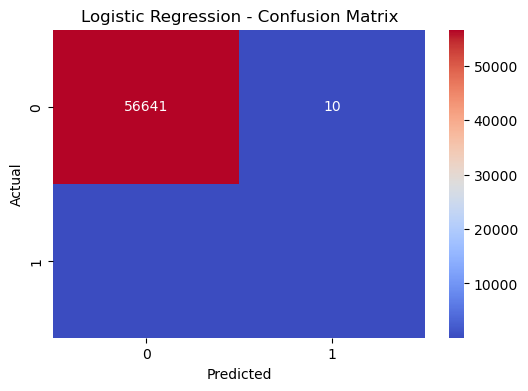

In [32]:
lr_cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('../charts/logistic_regression_confusion_matrix.png', bbox_inches='tight')
plt.show()


In [22]:
import joblib
joblib.dump(model, '../output/logistic_regression_model.pkl')

['../output/logistic_regression_model.pkl']

In [23]:
print("Trained Logistic Regression model successfully!")

Trained Logistic Regression model successfully!


In [24]:
loaded_model = joblib.load('../output/logistic_regression_model.pkl')

In [25]:
loaded_model.predict(x_test)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# STEP 2.9 — Build and Train Random Forest Classifier Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_model= RandomForestClassifier(n_estimators=100, random_state = 42)   # we will create 100 trees 

In [28]:
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)

In [ ]:
#Random Forest Model Evaluation

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.74      0.84        95

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

[[56649     2]
 [   25    70]]


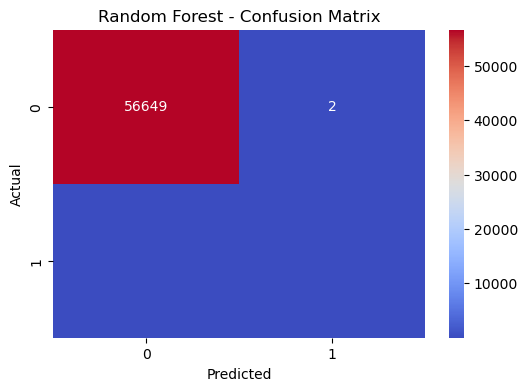

In [33]:
rf_cm = confusion_matrix(y_test, rf_y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig('../charts/random_forest_confusion_matrix.png', bbox_inches='tight')
plt.show()

In [ ]:
# Step 2.11 -Model Comparison

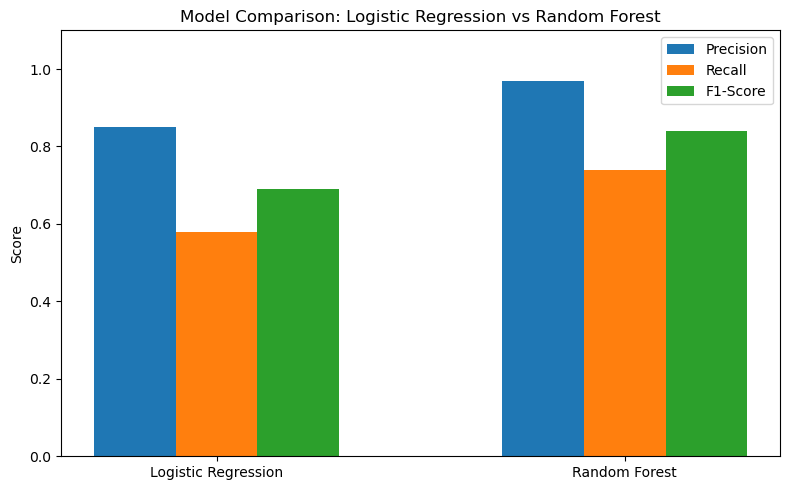

In [34]:
# Metrics from classification reports 
models = ['Logistic Regression', 'Random Forest']
precision = [0.85, 0.97]
recall = [0.58, 0.74]
f1_score = [0.69, 0.84]

x = np.arange(len(models))  # [0, 1]
width = 0.2

plt.figure(figsize=(8, 5))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1-Score')

plt.xticks(x, models)
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.title('Model Comparison: Logistic Regression vs Random Forest')
plt.legend()

plt.tight_layout()

plt.savefig('../charts/model_comparison_bar.png', bbox_inches='tight')
plt.show()
